In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
#with open("../ressources/llm_evaluated_s14s15s16_n300_24_12_20_target.pickle", "rb") as file:
with open("../ressources/dpo_rl_01_24-12-24_s17_n600_e10_r100/dataset.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_concat_s14s15s16_n300_24-12-18.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df

,description,configuration,parameters,argos,type,scores_bt1,scores_bt2,bt1,bt2,scores_bt1_scaled,scores_bt2_scaled,chosen,rejected,score_chosen,score_rejected,dataset_position
0,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-2.312799,-2.711589,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,1.000000,0.992795,<s>[INST] The environment features a circle co...,<s>[INST] The environment features a circle co...,1.000000,0.992795,0
1,The rectangular area has dimensions 4.49 m x 7...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-9.703568,-8.558424,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.858647,0.875811,<s>[INST] The rectangular area has dimensions ...,<s>[INST] The rectangular area has dimensions ...,0.875811,0.858647,0
2,"With a radius of 3.54 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-13.38949,-11.558672,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.803401,0.830842,"<s>[INST] With a radius of 3.54 meters, the ci...","<s>[INST] With a radius of 3.54 meters, the ci...",0.830842,0.803401,0
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-57.65811,-13.69603,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.000000,0.794323,"<s>[INST] In this setting, a circular arena wi...","<s>[INST] In this setting, a circular arena wi...",0.794323,0.000000,0
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-24.61573,-17.39142,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.635138,0.743418,<s>[INST] The environment is constructed as a ...,<s>[INST] The environment is constructed as a ...,0.743418,0.635138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,The environment features a rectangle with dime...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-6.625537,-6.591235,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.928181,0.928864,<s>[INST] The environment features a rectangle...,<s>[INST] The environment features a rectangle...,0.928864,0.928181,9
760,"A rectangular area, with a length of 4.26 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.0,0.0,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.000000,0.000000,"<s>[INST] A rectangular area, with a length of...","<s>[INST] A rectangular area, with a length of...",0.000000,0.000000,9
761,The environment consists of a rectangular area...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.0,0.0,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.000000,0.000000,<s>[INST] The environment consists of a rectan...,<s>[INST] The e

In [5]:
df = original_df

In [6]:
df['average_score'] = (df['scores_bt1'] + df['scores_bt2']) / 2

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['dataset_position','type',])['average_score'].mean().reset_index()

# Display the result
print(result)

    dataset_position          type average_score
0                  0   Aggregation      0.150323
1                  0    Connection     -20.08524
2                  0  Distribution    -14.249604
3                  0      Foraging      0.516667
4                  1   Aggregation      0.169959
5                  1    Connection    -18.746212
6                  1  Distribution    -13.992121
7                  1      Foraging      0.459524
8                  2   Aggregation      0.163373
9                  2    Connection     -17.18261
10                 2  Distribution    -13.428438
11                 2      Foraging      0.621429
12                 3   Aggregation      0.165079
13                 3    Connection    -19.896282
14                 3  Distribution    -14.355434
15                 3      Foraging      0.797619
16                 4   Aggregation      0.138287
17                 4    Connection    -17.281188
18                 4  Distribution    -18.915814
19                 4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

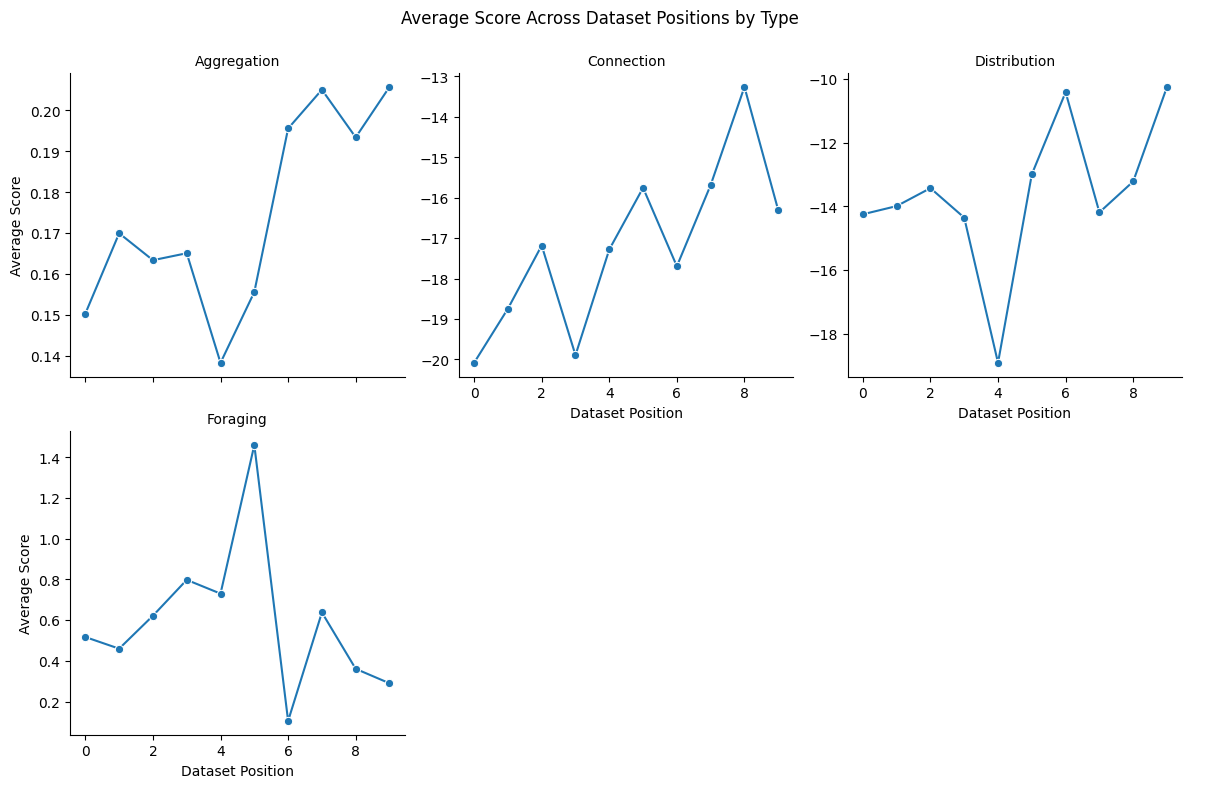

In [8]:
# Step 3: Create a FacetGrid using seaborn
g = sns.FacetGrid(result, col='type', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'dataset_position', 'average_score', marker='o')

# Step 4: Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Dataset Position", "Average Score")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Score Across Dataset Positions by Type')
plt.show()